In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

In [2]:
pd.options.display.max_rows = 12

In [3]:
#зареждаме данните
train = pd.read_csv('halloween/data/train.csv', index_col=['id'])
test = pd.read_csv('halloween/data/test.csv', index_col=['id'])
print('train: ', train.shape)
print('test: ', test.shape)

train:  (371, 6)
test:  (529, 5)


In [4]:
print(set(train.columns))

{'bone_length', 'color', 'type', 'has_soul', 'rotting_flesh', 'hair_length'}


In [5]:
X = train[['has_soul', 'rotting_flesh', 'hair_length', 'bone_length', 'color']]
y = train['type']

In [6]:
# да видим как изглеждат
X

,has_soul,rotting_flesh,hair_length,bone_length,color
id,,,,,
0,0.781142,0.350839,0.465761,0.354512,clear
1,0.439899,0.425868,0.531401,0.575560,green
2,0.791225,0.354330,0.811616,0.467875,black
4,0.884464,0.508723,0.636766,0.776652,black
5,0.636438,0.875862,0.418594,0.566117,green
7,0.280324,0.253277,0.441420,0.405680,green
...,...,...,...,...,...
878,0.428553,0.449944,0.788983,0.406062,white
886,0.635689,0.391760,0.660590,0.458132,blue


In [7]:
# имаме и числови и категорни данни

In [8]:
y
print(train.type.value_counts())

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64


In [9]:
# проверяваме за null стойности
train.isnull().sum().sort_values()

bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

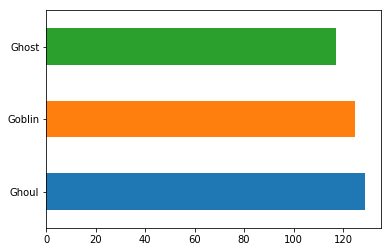

In [10]:
# Разпределение на видовете чудовища
train.type.value_counts().plot(kind='barh');

In [11]:
# да разделим данните на тестови и тренировъчни
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=600)
x_train_with_Polynomial, x_test_with_Polynomial, y_train_with_Polynomial, y_test_with_Polynomial = train_test_split(X, y, test_size=0.37, random_state=600)

In [12]:
# да разгледаме данните
x_train.describe()

,has_soul,rotting_flesh,hair_length,bone_length
count,233.000000,233.000000,233.000000,233.000000
mean,0.479790,0.506408,0.536826,0.440737
std,0.166916,0.144467,0.158400,0.137551
min,0.009402,0.095687,0.164321,0.100945
25%,0.363912,0.416513,0.416354,0.340442
50%,0.472031,0.498718,0.545880,0.440855
75%,0.600827,0.593537,0.651217,0.524080
max,0.935721,0.929440,1.000000,0.817001


In [13]:
x_test.describe()

,has_soul,rotting_flesh,hair_length,bone_length
count,138.000000,138.000000,138.000000,138.000000
mean,0.457213,0.507593,0.516094,0.423056
std,0.190467,0.150025,0.187617,0.124158
min,0.043321,0.158742,0.134600,0.061032
25%,0.318752,0.409053,0.390485,0.340062
50%,0.447923,0.514517,0.528192,0.416702
75%,0.599801,0.613704,0.640895,0.506867
max,0.907712,0.932466,0.965569,0.776652


In [14]:
# ще разгледаме категорните данни
pd.crosstab(train.type,train.color)

color,black,blood,blue,clear,green,white
type,,,,,,
Ghost,14,6,6,32,15,44
Ghoul,14,4,6,42,13,50
Goblin,13,2,7,46,14,43


In [15]:
# изглежда, че цветовете няма да ни носят особена информация и ще тренираме без тях
halloween = x_train.copy()
halloween = halloween.drop(['color'], axis=1)

In [16]:
halloween

,has_soul,rotting_flesh,hair_length,bone_length
id,,,,
590,0.415930,0.637446,0.416354,0.367799
429,0.230523,0.475223,0.558776,0.453214
840,0.593545,0.604174,0.617955,0.502599
766,0.464002,0.356863,0.658540,0.413576
340,0.292293,0.476217,0.597167,0.303391
224,0.285067,0.801465,0.230619,0.471764
...,...,...,...,...
435,0.263063,0.531701,0.428498,0.340442
728,0.725960,0.536090,0.751614,0.687080


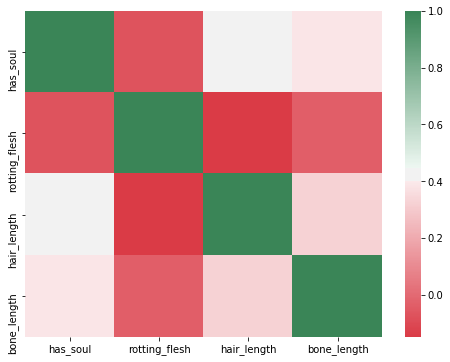

In [17]:
# да видим дали има корелации в данните ни
corr = halloween.corr()
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(10, 140, as_cmap=True)
sns.heatmap(corr, cmap=cmap)

In [18]:
# в сетът ни няма много фичърии  ще си направим няколко от комбинации на вече съществуващи
halloween['bonel_hsoul'] = halloween['bone_length'] *  halloween['has_soul'] 
halloween['bonel_hairl'] = halloween['bone_length'] * halloween['hair_length']
halloween['hairl_hsoul'] = halloween['hair_length'] * halloween['has_soul']

In [19]:
halloween.describe()

,has_soul,rotting_flesh,hair_length,bone_length,bonel_hsoul,bonel_hairl,hairl_hsoul
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.479790,0.506408,0.536826,0.440737,0.220351,0.243604,0.269233
std,0.166916,0.144467,0.158400,0.137551,0.118968,0.118610,0.140627
min,0.009402,0.095687,0.164321,0.100945,0.004859,0.023789,0.003026
25%,0.363912,0.416513,0.416354,0.340442,0.136017,0.144174,0.170586
50%,0.472031,0.498718,0.545880,0.440855,0.201804,0.239108,0.255591
75%,0.600827,0.593537,0.651217,0.524080,0.286412,0.320706,0.365172
max,0.935721,0.929440,1.000000,0.817001,0.575552,0.655573,0.708692


In [20]:
x_test_halloween = x_test.copy()
x_test_halloween['bonel_hsoul'] = x_test_halloween['bone_length'] *  x_test_halloween['has_soul'] 
x_test_halloween['bonel_hairl'] = x_test_halloween['bone_length'] * x_test_halloween['hair_length']
x_test_halloween['hairl_hsoul'] = x_test_halloween['hair_length'] * x_test_halloween['has_soul']
x_test_halloween = x_test_halloween.drop(['color'], axis=1)

In [21]:
x_test_halloween.describe()

,has_soul,rotting_flesh,hair_length,bone_length,bonel_hsoul,bonel_hairl,hairl_hsoul
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.457213,0.507593,0.516094,0.423056,0.202107,0.227692,0.254066
std,0.190467,0.150025,0.187617,0.124158,0.120272,0.125420,0.159187
min,0.043321,0.158742,0.134600,0.061032,0.018943,0.024790,0.009476
25%,0.318752,0.409053,0.390485,0.340062,0.112203,0.140364,0.116130
50%,0.447923,0.514517,0.528192,0.416702,0.175299,0.200917,0.228431
75%,0.599801,0.613704,0.640895,0.506867,0.276018,0.299012,0.364618
max,0.907712,0.932466,0.965569,0.776652,0.686921,0.729292,0.734639


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

print (halloween.shape)
print (y_train.shape)

(233, 7)
(233,)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_features = 'auto')
parameter_grid = {
                  'max_depth' : [None, 1, 10, 50, 100],
                  'min_samples_split' : [2, 3, 6, 9],
                  'min_weight_fraction_leaf' : [0.0, 0.01, 0.1],
                  'max_leaf_nodes' : [10, 20, 30, 40],
                  'random_state' : [1280],
                 }

gsearch_rf = GridSearchCV(classifier, param_grid=parameter_grid)
gsearch_rf.fit(halloween, y_train)

print('Best score: {}'.format(gsearch_rf.best_score_))
print('Best parameters: {}'.format(gsearch_rf.best_params_))

Best score: 0.721030042918455
Best parameters: {'min_weight_fraction_leaf': 0.1, 'max_leaf_nodes': 10, 'min_samples_split': 2, 'max_depth': 1, 'random_state': 1280}


In [24]:
# Видяхме кои са най-добрите параметри ще проверим и с други за по-добър резултат
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_features = 'auto')
parameter_grid = {
                  'max_depth' : [None, 1, 10, 50, 100],
                  'min_samples_split' : [2, 3, 6, 9],
                  'min_weight_fraction_leaf' : [0.0, 0.001, 0.01, 0.05, 0.1],
                  'max_leaf_nodes' : [10, 20, 30, 40, 50, 60],
                  'random_state' : [1280],
                 }

gsearch_rf = GridSearchCV(classifier, param_grid=parameter_grid)
gsearch_rf.fit(halloween, y_train)

print('Best score: {}'.format(gsearch_rf.best_score_))
print('Best parameters: {}'.format(gsearch_rf.best_params_))

Best score: 0.7253218884120172
Best parameters: {'min_weight_fraction_leaf': 0.05, 'max_leaf_nodes': 20, 'min_samples_split': 9, 'max_depth': None, 'random_state': 1280}


In [25]:
#Test score
gsearch_rf.fit(x_test_halloween, y_test)
print('Best score: {}'.format(gsearch_rf.best_score_))

Best score: 0.782608695652174


In [26]:
# Няма промяна в най-добрите резултати, така че ще запазим тези параметри

In [27]:
# Ще пробваме и с логистична регресия

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

param = {
                  'C' : [0.005, 0.01, 1, 5, 10],
                  'tol': [0.0001, 0.001, 0.005, 0.01]
                 }

grid_search = GridSearchCV(lg, param_grid=param)
grid_search.fit(halloween, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7124463519313304
Best parameters: {'C': 10, 'tol': 0.01}


In [28]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

param = {
                  'C' : [1, 5, 10, 15 , 20],
                  'tol': [0.0005, 0.0001, 0.001, 0.005]
                 }

grid_search = GridSearchCV(lg, param_grid=param)
grid_search.fit(halloween, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7081545064377682
Best parameters: {'C': 10, 'tol': 0.0005}


In [29]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

param = {
                  'C' : [1, 5, 10, 15 , 20],
                  'tol': [0.0005, 0.0001, 0.001, 0.005],
                  'fit_intercept': [False, True],
                  'random_state': [1280],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear']
                 }

grid_search = GridSearchCV(lg, param_grid=param)
grid_search.fit(halloween, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7124463519313304
Best parameters: {'C': 5, 'tol': 0.0005, 'solver': 'newton-cg', 'random_state': 1280, 'fit_intercept': True}


In [30]:
lg.fit(halloween, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
lg.score(halloween, y_train)

0.66952789699570814

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(halloween, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [34]:
#Test score
lg.score(x_test_halloween, y_test)

0.75362318840579712

In [35]:
# Ще опитаме и  с DecisionTree

In [36]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier().fit(halloween, y_train)
print(classifier.score(halloween, y_train))
print("test score: ", classifier.score(x_test_halloween, y_test))

1.0
test score:  0.702898550725


In [37]:
classifier = DecisionTreeClassifier(min_samples_split=50).fit(halloween, y_train)
print(classifier.score(halloween, y_train))
print("test score: ", classifier.score(x_test_halloween, y_test))

0.729613733906
test score:  0.666666666667


In [38]:
classifier = DecisionTreeClassifier(min_samples_split=100).fit(halloween, y_train)
print(classifier.score(halloween, y_train))
print("test score: ", classifier.score(x_test_halloween, y_test))

0.673819742489
test score:  0.666666666667


In [39]:
# Ще опитаме и като си създадем допълнително фичъри с PolynomialFeatures  ще тренираме по същите начини
from sklearn.preprocessing import PolynomialFeatures

# , x_test_with_Polynomial, y_train_with_Polynomial, y_test_with_Polynomial

x_train_with_Polynomial = x_train_with_Polynomial.drop(['color'], axis=1)
x_test_with_Polynomial = x_test_with_Polynomial.drop(['color'], axis=1)



In [40]:
poly = PolynomialFeatures(2)
poly.fit_transform(x_train_with_Polynomial)

array([[ 1.        ,  0.41592986,  0.63744629, ...,  0.17335043,
         0.15313447,  0.13527607],
       [ 1.        ,  0.23052293,  0.47522345, ...,  0.31223107,
         0.25324501,  0.20540248],
       [ 1.        ,  0.59354486,  0.60417429, ...,  0.38186798,
         0.31058345,  0.25260584],
       ..., 
       [ 1.        ,  0.93572133,  0.59308194, ...,  0.4639868 ,
         0.39817083,  0.34169078],
       [ 1.        ,  0.62582412,  0.34756618, ...,  0.18256412,
         0.22117121,  0.26794261],
       [ 1.        ,  0.78751279,  0.53645578, ...,  0.16651752,
         0.29823397,  0.53413898]])

In [41]:
# poly = PolynomialFeatures(interaction_only=True)
# poly.fit_transform(x_train_with_Polynomial)

In [42]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

param = {
                  'C' : [1, 5, 10, 15 , 20],
                  'tol': [0.0005, 0.0001, 0.001, 0.005],
                  'fit_intercept': [False, True],
                  'random_state': [1280],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear']
                 }

grid_search = GridSearchCV(lg, param_grid=param)
grid_search.fit(x_train_with_Polynomial, y_train_with_Polynomial)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.6866952789699571
Best parameters: {'C': 20, 'tol': 0.0005, 'solver': 'liblinear', 'random_state': 1280, 'fit_intercept': True}


In [43]:
lg.fit(x_train_with_Polynomial, y_train_with_Polynomial)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
lg.score(x_test_with_Polynomial, y_test_with_Polynomial)

0.74637681159420288

In [45]:
classifier = DecisionTreeClassifier().fit(x_train_with_Polynomial, y_train_with_Polynomial)
print(classifier.score(x_train_with_Polynomial, y_train_with_Polynomial))
print("test score: ", classifier.score(x_test_with_Polynomial, y_test_with_Polynomial))

1.0
test score:  0.702898550725


In [46]:
classifier = DecisionTreeClassifier(min_samples_split=50).fit(x_train_with_Polynomial, y_train_with_Polynomial)
print(classifier.score(x_train_with_Polynomial, y_train_with_Polynomial))
print("test score: ", classifier.score(x_test_with_Polynomial, y_test_with_Polynomial))

0.738197424893
test score:  0.666666666667


In [47]:
classifier = DecisionTreeClassifier(min_samples_split=100).fit(x_train_with_Polynomial, y_train_with_Polynomial)
print(classifier.score(x_train_with_Polynomial, y_train_with_Polynomial))
print("test score: ", classifier.score(x_test_with_Polynomial, y_test_with_Polynomial))

0.643776824034
test score:  0.652173913043


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_features = 'auto')
parameter_grid = {
                  'max_depth' : [None, 1, 10, 50, 100],
                  'min_samples_split' : [2, 3, 6, 9],
                  'min_weight_fraction_leaf' : [0.0, 0.01, 0.1],
                  'max_leaf_nodes' : [10, 20, 30, 40],
                  'random_state' : [1280],
                 }

gsearch_rf = GridSearchCV(classifier, param_grid=parameter_grid)
gsearch_rf.fit(x_train_with_Polynomial, y_train_with_Polynomial)

print('Best score: {}'.format(gsearch_rf.best_score_))
print('Best parameters: {}'.format(gsearch_rf.best_params_))

Best score: 0.6866952789699571
Best parameters: {'min_weight_fraction_leaf': 0.1, 'max_leaf_nodes': 10, 'min_samples_split': 2, 'max_depth': 1, 'random_state': 1280}


In [49]:
#Test score
gsearch_rf.fit(x_test_with_Polynomial, y_test_with_Polynomial)
print('Best score: {}'.format(gsearch_rf.best_score_))

Best score: 0.7898550724637681


In [50]:
# Ще опитаме и с други параметри

classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_features = 'auto')
parameter_grid = {
                  'max_depth' : [None, 1, 10, 50, 100],
                  'min_samples_split' : [2, 3, 6],
                  'min_weight_fraction_leaf' : [0.01, 0.1, 0.2, 0.5],
                  'max_leaf_nodes' : [2, 5, 7,10, 20],
                  'random_state' : [1280],
                 }

gsearch_rf = GridSearchCV(classifier, param_grid=parameter_grid)
gsearch_rf.fit(x_train_with_Polynomial, y_train_with_Polynomial)

print('Best score: {}'.format(gsearch_rf.best_score_))
print('Best parameters: {}'.format(gsearch_rf.best_params_))

Best score: 0.703862660944206
Best parameters: {'min_weight_fraction_leaf': 0.01, 'max_leaf_nodes': 5, 'min_samples_split': 6, 'max_depth': None, 'random_state': 1280}


In [51]:
#Test score
gsearch_rf.fit(x_test_with_Polynomial, y_test_with_Polynomial)
print('Best score: {}'.format(gsearch_rf.best_score_))

Best score: 0.7898550724637681
